# <Font color = Blue> Appliances energy prediction Data Set

## <font color= purple> About Dataset 

<font color= purple>Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. 

The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).</font>
    
Data set Link : https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

## <font color= Darkgreen>Attribute Information:

</br>date time year-month-day hour:minute:second <br>
Appliances, energy use in Wh<br>
lights, energy use of light fixtures in the house in Wh<br>
T1, Temperature in kitchen area, in Celsius<br>
RH_1, Humidity in kitchen area, in %<br>
T2, Temperature in living room area, in Celsius<br>
RH_2, Humidity in living room area, in %<br>
T3, Temperature in laundry room area<br>
RH_3, Humidity in laundry room area, in %<br>
T4, Temperature in office room, in Celsius<br>
RH_4, Humidity in office room, in %<br>
T5, Temperature in bathroom, in Celsius<br>
RH_5, Humidity in bathroom, in %<br>
T6, Temperature outside the building (north side), in Celsius<br>
RH_6, Humidity outside the building (north side), in %<br>
T7, Temperature in ironing room , in Celsius<br>
RH_7, Humidity in ironing room, in %<br>
T8, Temperature in teenager room 2, in Celsius<br>
RH_8, Humidity in teenager room 2, in %<br>
T9, Temperature in parents room, in Celsius<br>
RH_9, Humidity in parents room, in %<br>
To, Temperature outside (from Chievres weather station), in Celsius<br>
Pressure (from Chievres weather station), in mm Hg<br>
RH_out, Humidity outside (from Chievres weather station), in %<br>
Wind speed (from Chievres weather station), in m/s<br>
Visibility (from Chievres weather station), in km<br>
Tdewpoint (from Chievres weather station), Â°C<br>
rv1, Random variable 1, nondimensional<br>
rv2, Random variable 2, nondimensional</font>

# <FONT COLOR = BLUE>READING THE DATA

In [3]:
import pandas as pd


In [4]:


df =pd.read_csv(r'D:\Hamoye Graded Quiz - Stage B\quiz Data\Appliances energy prediction Data Set_original\energydata_complete.csv',parse_dates=['date'])

In [5]:
df.shape

(19735, 29)

In [6]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [7]:
df.columns = [x.lower() for x in df.columns]

In [8]:
df = df.set_index('date')

In [9]:
df.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   t1           19735 non-null  float64
 3   rh_1         19735 non-null  float64
 4   t2           19735 non-null  float64
 5   rh_2         19735 non-null  float64
 6   t3           19735 non-null  float64
 7   rh_3         19735 non-null  float64
 8   t4           19735 non-null  float64
 9   rh_4         19735 non-null  float64
 10  t5           19735 non-null  float64
 11  rh_5         19735 non-null  float64
 12  t6           19735 non-null  float64
 13  rh_6         19735 non-null  float64
 14  t7           19735 non-null  float64
 15  rh_7         19735 non-null  float64
 16  t8           19735 non-null  float64
 17  rh_8         19735 non-null  float64
 18  t9         

## <FONT COLOR = BLUE> DATA STRUCTURE 

In [11]:
# check missing values
df.isnull().sum()

appliances     0
lights         0
t1             0
rh_1           0
t2             0
rh_2           0
t3             0
rh_3           0
t4             0
rh_4           0
t5             0
rh_5           0
t6             0
rh_6           0
t7             0
rh_7           0
t8             0
rh_8           0
t9             0
rh_9           0
t_out          0
press_mm_hg    0
rh_out         0
windspeed      0
visibility     0
tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [12]:
df.describe()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


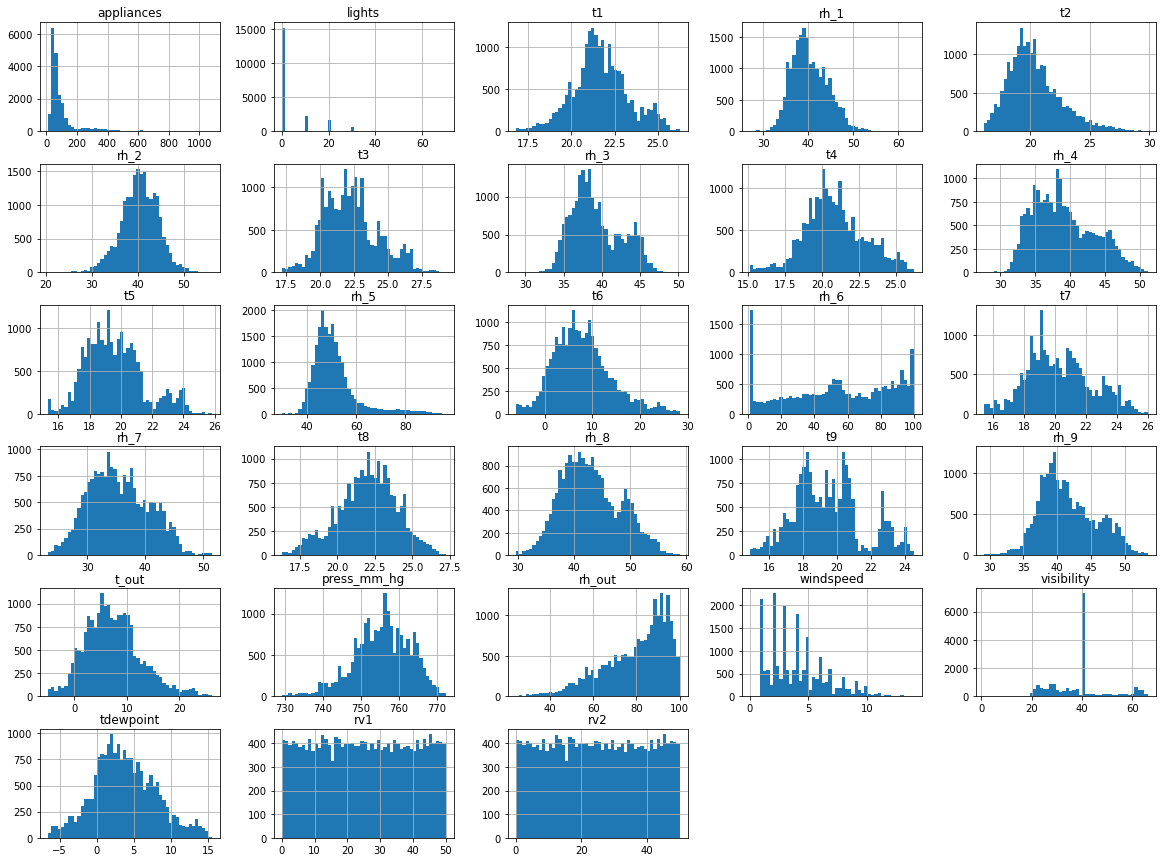

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.savefig("attribute_histograms_plots")
plt.show()

In [14]:
df.corr()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
t1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
rh_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
t2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
rh_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
t3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
rh_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
t4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
rh_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [15]:
import seaborn as sns


In [ ]:
sns.pairplot(df)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot = True, cmap= 'coolwarm')


In [16]:
sorted_appliances = df.sort_values('appliances',ascending=False)
sorted_appliances.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-16 18:50:00,1080,30,21.930000,42.766667,21.040000,38.080000,20.700000,40.633333,20.89,39.733333,...,17.79,40.672500,2.083333,765.033333,85.500000,3.666667,40.000000,-0.083333,27.408521,27.408521
2016-01-21 18:50:00,1070,30,19.600000,34.300000,18.426667,33.963333,18.390000,36.930000,17.70,35.400000,...,16.00,36.930000,-0.616667,764.533333,82.833333,1.000000,64.166667,-3.216667,11.735734,11.735734
2016-01-14 17:00:00,910,0,21.463333,41.693333,20.856667,38.363333,21.666667,43.930000,18.70,42.660000,...,17.00,43.466667,4.600000,747.900000,76.000000,7.000000,40.000000,0.700000,18.937972,18.937972
2016-04-04 15:40:00,900,0,23.000000,43.166667,22.200000,40.426667,26.100000,38.930000,21.60,41.526667,...,20.70,43.333333,14.766667,749.266667,59.666667,7.000000,40.000000,7.000000,15.105153,15.105153
2016-01-21 19:00:00,890,20,19.730000,37.863333,18.566667,34.090000,18.390000,36.863333,17.60,35.133333,...,16.00,36.730000,-0.800000,764.500000,84.000000,1.000000,64.000000,-3.200000,3.221583,3.221583


In [17]:
import warnings
warnings.filterwarnings("ignore")

The number f the 0,1%top values of appliances' load is 19 and they have power load higher than 790 wh.


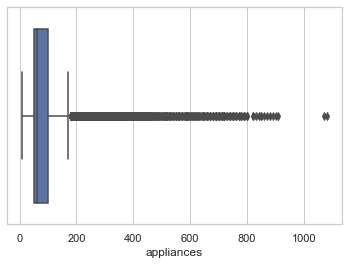

In [18]:
sorted_appliances=df.sort_values('appliances',ascending=False)
print("The number f the 0,1%top values of appliances' load is", 
      len(sorted_appliances.head(len(sorted_appliances)//1000)),
          "and they have power load higher than",sorted_appliances.appliances[19],"wh.")

# boxplot appliances
sns.set(style="whitegrid")
ax = sns.boxplot(sorted_appliances.appliances)

In [19]:
# Removing Outliers setting appliances more than 790 as outliers and dropping it 
df = df.dropna()
df= df.drop(df[(df.appliances>790)|(df.appliances<0)].index)

In [20]:
sorted_appliances = df.sort_values('appliances',ascending=False)
sorted_appliances.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-17 17:40:00,790,10,21.566667,38.626667,20.10,37.040909,20.790000,37.260000,21.066667,36.966667,...,18.10,37.290000,-0.266667,764.833333,79.666667,2.000000,40.000000,-3.466667,36.170216,36.170216
2016-05-21 09:40:00,790,0,23.000000,50.260000,25.53,43.133333,24.390000,44.490000,23.600000,47.260000,...,23.00,47.462500,16.900000,756.333333,79.666667,4.666667,28.333333,13.333333,44.856357,44.856357
2016-01-14 18:50:00,790,10,22.166667,40.500000,21.70,38.626667,22.166667,42.133333,18.790000,44.626667,...,16.89,42.326667,4.083333,748.433333,76.833333,6.833333,40.000000,0.350000,30.487447,30.487447
2016-04-04 12:20:00,790,0,22.390000,45.563333,22.39,42.966667,25.000000,41.433333,21.600000,43.590000,...,20.60,44.433333,13.466667,749.866667,68.666667,7.000000,40.000000,7.766667,4.089491,4.089491
2016-04-29 11:40:00,780,0,20.133333,37.333333,18.26,39.590000,21.890000,34.260000,19.500000,35.663333,...,18.60,36.466667,7.233333,755.233333,89.000000,4.333333,26.000000,5.500000,44.465602,44.465602


In [21]:
df['hour']=df.index.hour
df['week']=df.index.week
df['weekday']= df.index.weekday
df['month']=df.index.month

In [22]:
import numpy as np
df['log_appliances']=np.log(df.appliances)

In [23]:
df['house_temp']= (df.t1+df.t2+df.t3+df.t4+df.t5+df.t7+df.t8+df.t9)/8
df['house_hum']= (df.rh_1+df.rh_2+df.rh_3+df.rh_4+df.rh_5+df.rh_7+df.rh_8+df.rh_9)/8

In [24]:
df['house_temp'].head()

date
2016-01-11 17:00:00    18.435000
2016-01-11 17:10:00    18.439167
2016-01-11 17:20:00    18.421667
2016-01-11 17:30:00    18.396250
2016-01-11 17:40:00    18.408750
Name: house_temp, dtype: float64

In [25]:
df.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,tdewpoint,rv1,rv2,hour,week,weekday,month,log_appliances,house_temp,house_hum
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,5.3,13.275433,13.275433,17,2,0,1,4.094345,18.435000,46.742500
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,5.2,18.606195,18.606195,17,2,0,1,4.094345,18.439167,46.672708
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,5.1,28.642668,28.642668,17,2,0,1,3.912023,18.421667,46.562917
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,5.0,45.410389,45.410389,17,2,0,1,3.912023,18.396250,46.468750
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,4.9,10.084097,10.084097,17,2,0,1,4.094345,18.408750,46.462917


In [26]:
#remove Additive assumptions
df['hour*lights']=df.hour*df.lights
df['t1rh1'] = df.t1 *df.rh_1
df['t2rh2'] = df.t2 *df.rh_2
df['t3rh3'] = df.t3 *df.rh_3
df['t4rh4'] = df.t4 *df.rh_4
df['t5rh5'] = df.t5 *df.rh_5
df['t6rh6'] = df.t6 *df.rh_6
df['t7rh7'] = df.t7 *df.rh_7
df['t8rh8'] = df.t8 *df.rh_8
df['t9rh9'] = df.t9 *df.rh_9

In [27]:
def code_mean(data,cat_feature,real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())


In [28]:
df['weekday_avg']=list(map(code_mean(df[:],'weekday',"appliances").get,df.weekday))
df['hour_avg']=list(map(code_mean(df[:],'hour',"appliances").get,df.hour))

In [29]:
df['weekday_avg'].head()

date
2016-01-11 17:00:00    110.896974
2016-01-11 17:10:00    110.896974
2016-01-11 17:20:00    110.896974
2016-01-11 17:30:00    110.896974
2016-01-11 17:40:00    110.896974
Name: weekday_avg, dtype: float64

In [30]:
df['hour_avg'].head()

date
2016-01-11 17:00:00    158.812121
2016-01-11 17:10:00    158.812121
2016-01-11 17:20:00    158.812121
2016-01-11 17:30:00    158.812121
2016-01-11 17:40:00    158.812121
Name: hour_avg, dtype: float64

In [31]:
df.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t2rh2,t3rh3,t4rh4,t5rh5,t6rh6,t7rh7,t8rh8,t9rh9,weekday_avg,hour_avg
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,859.968,885.206700,865.766667,947.600000,592.043511,715.978667,889.980000,775.527667,110.896974,158.812121
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,858.672,886.394100,873.857500,947.600000,574.432778,714.832000,889.312667,777.557333,110.896974,158.812121
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,856.832,889.230667,868.544733,945.711667,545.507733,712.653333,886.886000,773.500000,110.896974,158.812121
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,856.128,890.550000,863.713767,945.711667,536.690111,707.435333,879.479000,771.800000,110.896974,158.812121
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,854.976,890.550000,860.061700,947.548000,540.487556,709.156000,879.479000,771.800000,110.896974,158.812121


In [32]:
df_hour=df.resample('1H').mean()
df_30min =df.resample('30min').mean()

In [33]:
df_hour.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t2rh2,t3rh3,t4rh4,t5rh5,t6rh6,t7rh7,t8rh8,t9rh9,weekday_avg,hour_avg
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,...,856.829333,888.527022,865.964011,946.169778,554.915281,711.162778,884.102611,773.352500,110.896974,158.812121
2016-01-11 18:00:00,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,...,856.285333,886.948467,871.050550,940.731111,538.900833,724.603275,879.339537,769.099683,110.896974,187.426829
2016-01-11 19:00:00,173.333333,25.000000,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,...,918.042333,947.194409,907.027646,957.418201,516.283758,803.639470,893.576233,765.862903,110.896974,141.256098
2016-01-11 20:00:00,125.000000,35.000000,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,...,924.086998,955.471915,944.715828,1305.601119,475.450769,756.810111,942.331767,762.058033,110.896974,126.982968
2016-01-11 21:00:00,103.333333,23.333333,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,...,925.660526,940.519133,930.867622,1269.097126,480.490483,779.185664,948.882974,756.803367,110.896974,96.496350


In [34]:
df_30min.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t2rh2,t3rh3,t4rh4,t5rh5,t6rh6,t7rh7,t8rh8,t9rh9,weekday_avg,hour_avg
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,56.666667,30.000000,19.890000,46.863333,19.200000,44.713056,19.790000,44.817778,18.975556,45.816389,...,858.490667,886.943822,869.389633,946.970556,570.661341,714.488000,888.726222,775.528333,110.896974,158.812121
2016-01-11 17:30:00,53.333333,40.000000,19.890000,46.142222,19.200000,44.540000,19.790000,44.977778,18.890000,45.661111,...,855.168000,890.110222,862.538389,945.369000,539.169222,707.837556,879.479000,771.176667,110.896974,158.812121
2016-01-11 18:00:00,60.000000,46.666667,19.845556,45.641389,19.200000,44.477778,19.750000,44.863333,18.890000,45.814444,...,853.973333,886.051567,865.434856,940.962222,536.096252,707.037778,879.479000,769.930000,110.896974,187.426829
2016-01-11 18:30:00,293.333333,56.666667,19.950000,46.116667,19.337778,44.400000,19.790000,44.863333,18.926667,46.318889,...,858.597333,887.845367,876.666244,940.500000,541.705415,742.168772,879.200074,768.269367,110.896974,187.426829
2016-01-11 19:00:00,260.000000,33.333333,20.273333,52.206667,19.717778,45.111111,19.937778,45.973333,19.000000,47.427778,...,889.560074,916.680319,901.127778,944.794000,532.611649,819.320252,881.779630,766.571272,110.896974,141.256098


In [35]:
#setting the assumptions as to lower or higher
#Tryouts
df_hour['low_consum']=(df_hour.appliances+25<(df_hour.hour_avg))*1
df_hour['High_consum']=(df_hour.appliances+25<(df_hour.hour_avg))*1

df_30min['low_consum']=(df_30min.appliances+25<(df_30min.hour_avg))*1
df_30min['High_consum']=(df_30min.appliances+35<(df_30min.hour_avg))*1

In [36]:
def daily(x,df=df):
    return df.groupby('weekday')[x].mean()
def hourly(x,df=df):
    return df.groupby('hour')[x].mean()
def monthly_daily(x,df=df):
    by_day =df.pivot_table(index='weekday',columns=['month'],values=x,aggfunc='mean')
    return round(by_day,ndigits=2)

# <font color = REd> Daily consumption

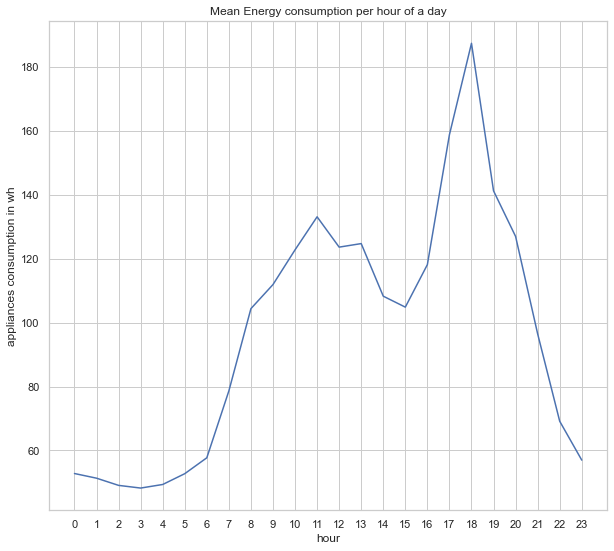

In [37]:
#plotting the hourly consumption
hourly('appliances').plot(figsize=(10,9))
plt.xlabel('hour')
plt.ylabel('appliances consumption in wh')
ticks = list(range(0,24,1))
plt.title('Mean Energy consumption per hour of a day')
plt.xticks(ticks);

# <font color = Red>weekly consumption

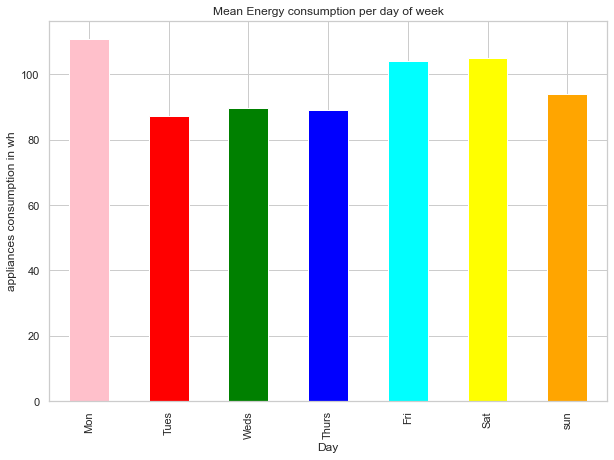

In [38]:
#weekly consumption

daily('appliances').plot(kind='bar',color=['pink','red','green','blue','cyan','yellow','orange'],figsize=(10,7))
ticks = list(range(0,7,1))
labels="Mon Tues Weds Thurs Fri Sat sun".split()
plt.xlabel('Day')
plt.ylabel('appliances consumption in wh')
plt.title('Mean Energy consumption per day of week')
plt.xticks(ticks,labels);

# <font color = Red> Monthly Energy consumption

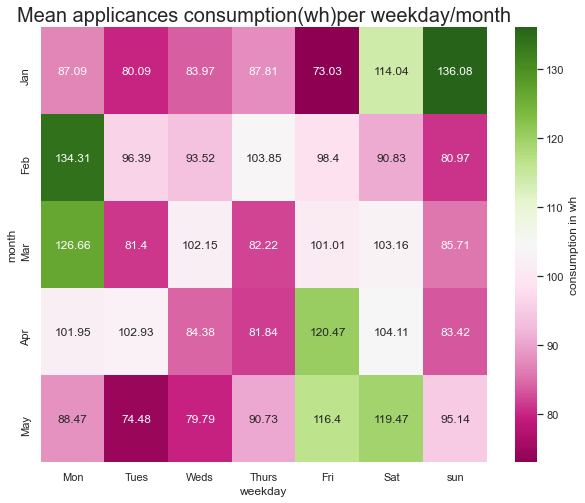

In [39]:
#monthly consumption
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.heatmap(monthly_daily('appliances').T,cmap="PiYG",
                 xticklabels="Mon Tues Weds Thurs Fri Sat sun".split(),
                 yticklabels="Jan Feb Mar Apr May ".split(),
                 annot=True,fmt='g',
                 cbar_kws={'label':'consumption in wh'}).set_title("Mean applicances consumption(wh)per weekday/month").set_fontsize('20')
plt.show()

Text(0.5, 0, 'Appliances Log(wH)')

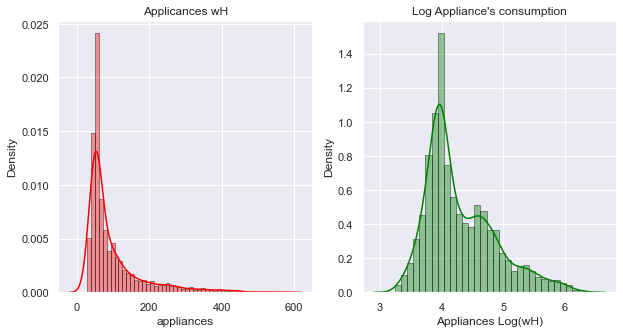

In [40]:
f,axes = plt.subplots(1,2,figsize=(10,5))

sns.distplot(df_hour.appliances,hist=True,color='red',hist_kws={'edgecolor':'black'},ax=axes[0])
axes[0].set_title("Appliance's Consumption")
axes[0].set_title("Applicances wH")

sns.distplot(df_hour.log_appliances,hist=True,color='green',hist_kws={'edgecolor':"black"},ax=axes[1])
axes[1].set_title("Log Appliance's consumption")
axes[1].set_xlabel('Appliances Log(wH)')

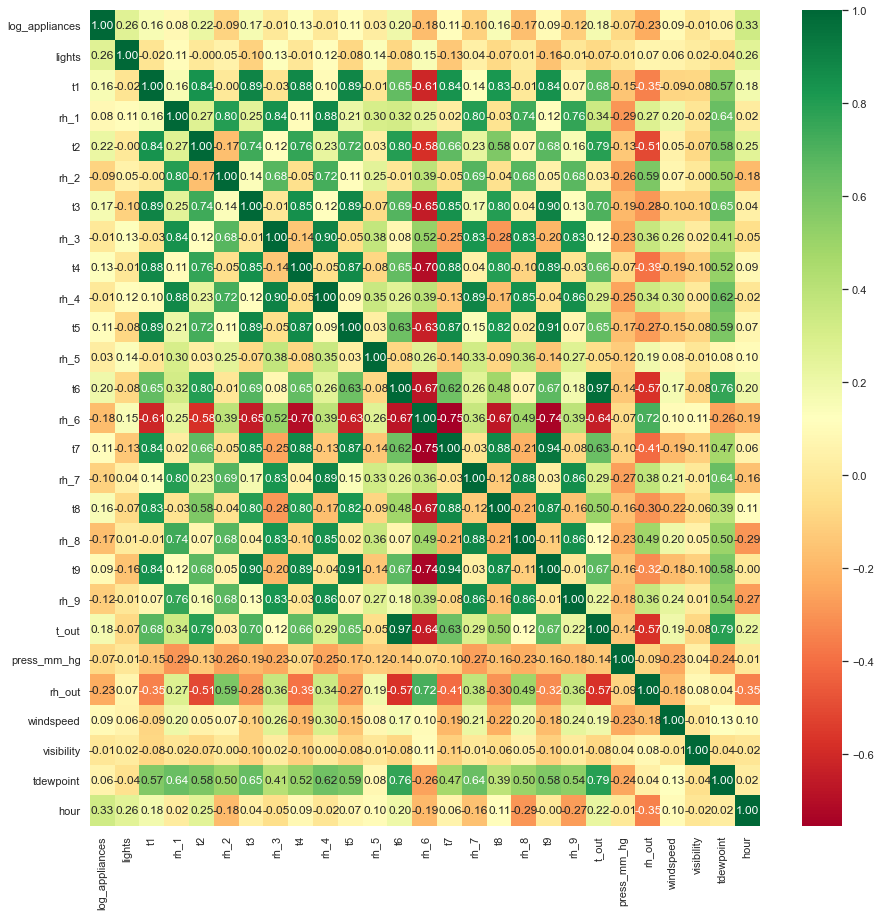

In [41]:
col = ['log_appliances','lights','t1','rh_1','t2','rh_2','t3',
       'rh_3','t4','rh_4','t5','rh_5','t6','rh_6','t7','rh_7',
       't8','rh_8','t9','rh_9','t_out','press_mm_hg','rh_out',
       'windspeed','visibility','tdewpoint','hour']
corr =df[col].corr()
plt.figure(figsize=(15,15))
sns.set(font_scale=1)
sns.heatmap(corr,annot=True,cmap='RdYlGn',fmt='.2f',xticklabels=col,yticklabels=col)
plt.show()
       

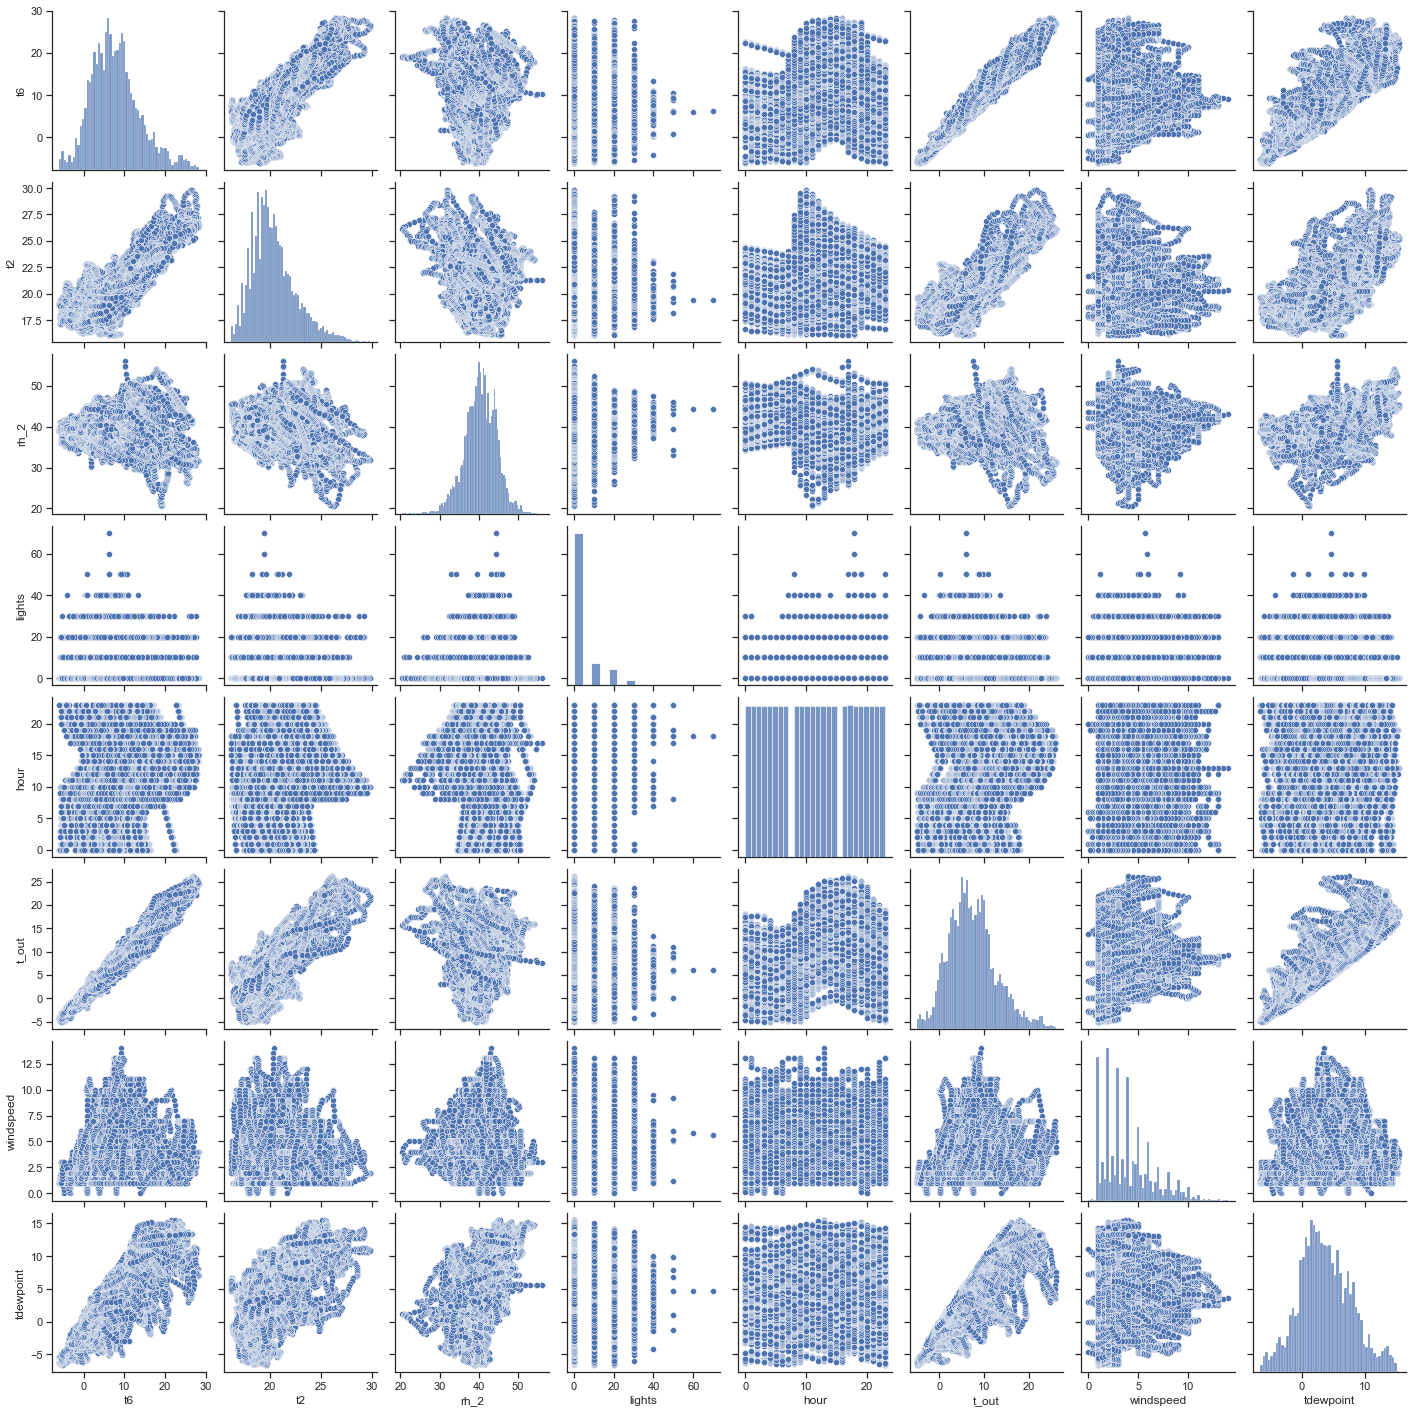

In [42]:
col = ['t6','t2','rh_2','lights','hour','t_out','windspeed','tdewpoint']
sns.set(style='ticks',color_codes=True)
sns.pairplot(df[col])
plt.show()

# <font color =Blue> Training the Model

In [43]:
for cat_feature in ['weekday','hour']:
    df_hour =pd.concat([df_hour,pd.get_dummies(df_hour[cat_feature])],axis=1)
    df_30min =pd.concat([df_30min,pd.get_dummies(df_30min[cat_feature])],axis=1)
    df=pd.concat([df,pd.get_dummies(df[cat_feature])],axis=1)


In [44]:
lin_model = ['low_consum','High_consum','hour','t6','rh_6','lights','hour*lights','windspeed','t6rh6']

In [45]:
df_hour.lights =df_hour.lights.astype(float)
df_hour.log_appliances =df_hour.log_appliances.astype(float)
df_hour.hour =df_hour.hour.astype(float)
df_hour.low_consum =df_hour.low_consum.astype(float)
df_hour.High_consum =df_hour.High_consum.astype(float)
df_hour.t6rh6 =df_hour.t6rh6.astype(float)

In [46]:
test_size=0.2
test_index = int(len(df_hour.dropna())*(1-test_size))
X1_train,X1_test= df_hour[lin_model].iloc[:test_index,],df_hour[lin_model].iloc[test_index:,]
y1_train,y1_test = df_hour.log_appliances.iloc[:test_index,],df_hour.log_appliances.iloc[test_index:,]

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

In [48]:
from sklearn import linear_model

lin_model = linear_model.LinearRegression()
lin_model.fit(X1_train,y1_train)

LinearRegression()

# <font color = Blue> Model evaluation and selection

In [49]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics


In [53]:
def evaluate(model,test_features,test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions-test_labels)
    mape = 100* np.mean(errors/test_labels)
    r_score = 100*r2_score(test_labels, predictions)
    accuracy = 100-mape
    print(model,'\n')
    print('MAPE               :{:0.2f}%'.format(mape))
    print('Average Error      :{:0.4f}%'.format(np.mean(errors)))
    print('variance score R^2 :{:0.2f}%'.format(r_score))
    print('Accuracy           :{:0.2f}%'.format(accuracy))

In [54]:
evaluate(lin_model,X1_test,y1_test)

LinearRegression() 

MAPE               :8.13%
Average Error      :0.3494%
variance score R^2 :14.00%
Accuracy           :91.87%


In [55]:
cv = TimeSeriesSplit(n_splits = 10)

print('Linear Model')
scores = cross_val_score(lin_model,X1_train,y1_train,cv=cv,scoring ='neg_mean_absolute_error')
print("Accuracy : %0.2f(+/- %0.2f)degrees" % (100+scores.mean(),scores.std()*2))
scores = cross_val_score(lin_model,X1_train,y1_train,cv=cv,scoring ='r2')
print("R^2 : %0.2f(+/- %0.2f)degrees" % (scores.mean(),scores.std()*2))

Linear Model
Accuracy : 99.64(+/- 0.06)degrees
R^2 : 0.26(+/- 0.24)degrees
